In [ ]:
## from google.colab import drive
## drive.mount('/content/drive')

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest
import scipy as sp
import pandas as pd
import statsmodels.formula.api as smf

In [36]:
## results = '/content/drive/MyDrive/.S23/497 - Peanut Butter Research Group/Code Files & Github/Dataset/Results'
results = pd.read_csv("TimedtoSequential.csv")
results.info()
results.shape
results.head()
linregdata = pd.read_csv("TimedtoSequentialNoNans.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date Sampled  1551 non-null   object 
 1   Address       1551 non-null   object 
 2   1st Draw      1551 non-null   float64
 3   5th Draw      1549 non-null   float64
 4   8th Draw      1547 non-null   float64
 5   3 Minute      1545 non-null   float64
 6   5 Minute      469 non-null    float64
dtypes: float64(5), object(2)
memory usage: 84.9+ KB


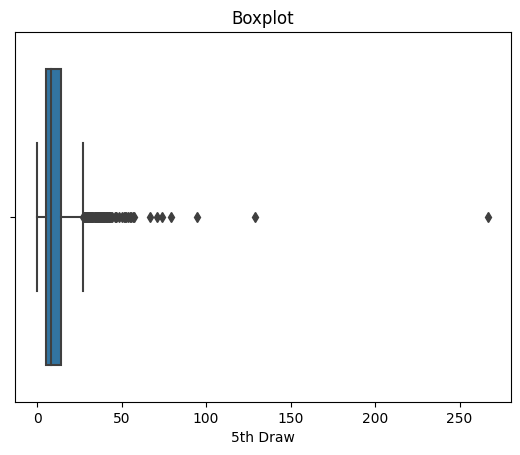

In [37]:
sns.boxplot(data=results, x='5th Draw');
plt.title("Boxplot");

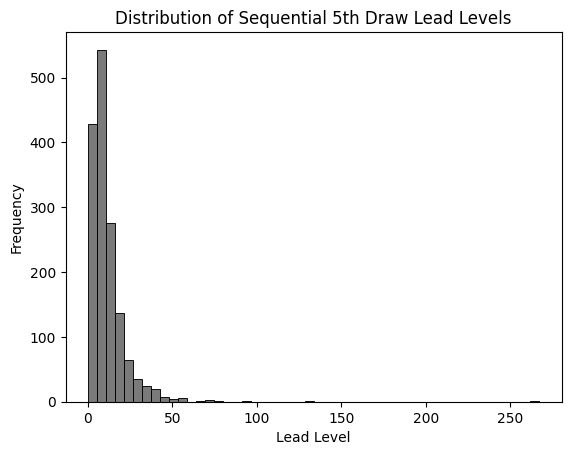

In [38]:
sns.histplot(data=results, x='5th Draw', bins=50, color='.3');
plt.ylabel('Frequency')
plt.xlabel('Lead Level')
plt.title("Distribution of Sequential 5th Draw Lead Levels");

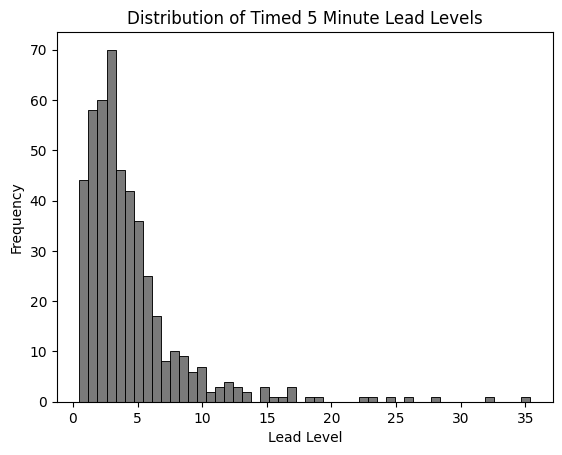

In [39]:
sns.histplot(data=results, x='5 Minute', bins=50, color='.3');
plt.ylabel('Frequency')
plt.xlabel('Lead Level')
plt.title("Distribution of Timed 5 Minute Lead Levels");

In [40]:
results['5th Draw'].mean()
## results['5th Draw'].median()
## results['5 Minute'].mean()
## results['5 Minute'].median()

11.408174306003872

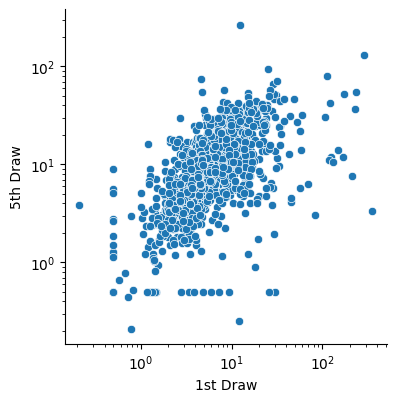

In [41]:
sns.pairplot(results, x_vars=['1st Draw'], 
             y_vars='5th Draw', height=4, aspect=1, kind='scatter')
plt.xscale('log')
plt.yscale('log')
plt.show()

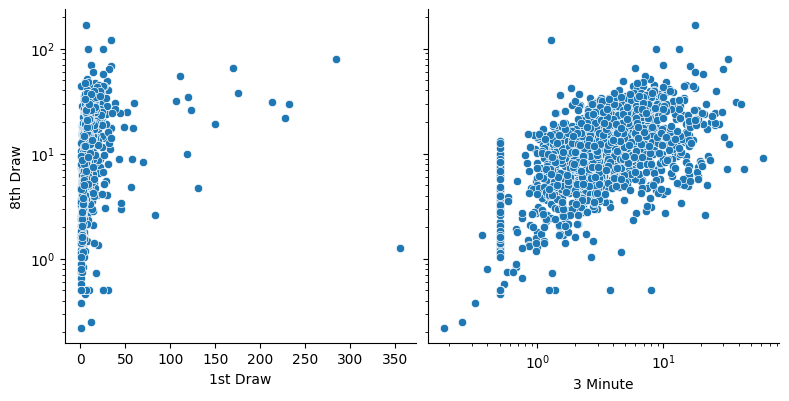

In [42]:
sns.pairplot(results, x_vars=['1st Draw', '3 Minute'], 
             y_vars='8th Draw', height=4, aspect=1, kind='scatter')
plt.xscale('log')
plt.yscale('log')
plt.show()

<ipython-input-43-d9eaffd72e69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(results.corr(), cmap="Purples", annot = True, linewidths=0, annot_kws={"size":6})


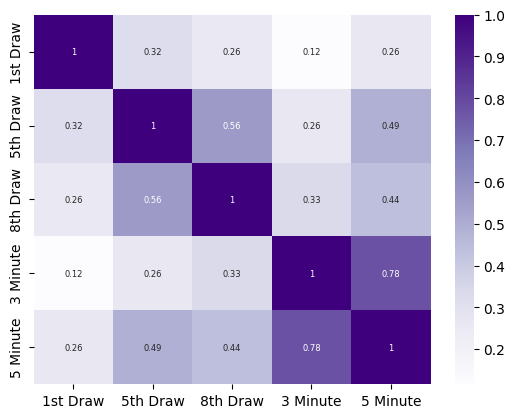

In [43]:
sns.heatmap(results.corr(), cmap="Purples", annot = True, linewidths=0, annot_kws={"size":6})
plt.show()

In [44]:
x = linregdata['5 Minute']
y = linregdata['5th Draw']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [45]:
linregdata.info()
linregdata.shape
linregdata.head()
linregdata = linregdata.dropna()
x_train
y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date Sampled  468 non-null    object 
 1   Address       468 non-null    object 
 2   1st Draw      468 non-null    float64
 3   5th Draw      468 non-null    float64
 4   8th Draw      468 non-null    float64
 5   3 Minute      468 non-null    float64
 6   5 Minute      468 non-null    float64
dtypes: float64(5), object(2)
memory usage: 25.7+ KB


45      5.79
439    17.10
260    23.70
27     50.30
110    15.30
       ...  
343    11.00
359     7.87
323     9.41
280     9.60
8      39.90
Name: 5th Draw, Length: 327, dtype: float64

In [46]:
rng = np.random.default_rng()
stats.kstest(stats.uniform.rvs(size=100, random_state=rng), stats.norm.cdf)

KstestResult(statistic=0.5009311813842364, pvalue=9.805796320989306e-24, statistic_location=0.002334127705982514, statistic_sign=-1)

In [47]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               5th Draw   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     87.95
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.18e-18
Time:                        00:53:03   Log-Likelihood:                -1190.3
No. Observations:                 327   AIC:                             2385.
Df Residuals:                     325   BIC:                             2392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0250      0.768      9.141      0.000       5.513       8.537
5 Minute       1.2663      0.135      9.378      0.000       1.001       1.532
==============================================================================
Omnibus:                      183.628   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2798.269
Skew:                           1.962   Prob(JB):                         0.00
Kurtosis:                      16.783   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
x_multi = results.drop('5th Draw', axis=1)
x_multi_cons = sm.add_constant(x_multi)
x_multi_cons.isna().sum()
results['3 Minute'].apply(lambda x: float(x))

0       1.23
1       2.66
2       0.50
3       1.20
4       0.50
        ... 
1546    5.80
1547    7.74
1548    3.05
1549    0.50
1550    6.37
Name: 3 Minute, Length: 1551, dtype: float64

In [49]:
x_multi_cons.isna().sum()

const              0
Date Sampled       0
Address            0
1st Draw           0
8th Draw           4
3 Minute           6
5 Minute        1082
dtype: int64

In [50]:
results = results.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
results.info()
results.shape
results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date Sampled  0 non-null      float64
 1   Address       0 non-null      float64
 2   1st Draw      1551 non-null   float64
 3   5th Draw      1549 non-null   float64
 4   8th Draw      1547 non-null   float64
 5   3 Minute      1545 non-null   float64
 6   5 Minute      469 non-null    float64
dtypes: float64(7)
memory usage: 84.9 KB


,Date Sampled,Address,1st Draw,5th Draw,8th Draw,3 Minute,5 Minute
0,NaN,NaN,5.17,10.30,7.12,1.23,1.23
1,NaN,NaN,9.31,23.40,19.40,2.66,NaN
2,NaN,NaN,12.30,267.00,9.71,0.50,NaN
3,NaN,NaN,2.45,6.46,9.66,1.20,NaN
4,NaN,NaN,3.24,3.42,2.84,0.50,0.50


In [51]:
twoToThreeMinute = results['3 Minute'].values
fiveMinute = results['5 Minute'].values
eightDraw = results['8th Draw'].values
result1 = kstest(twoToThreeMinute, fiveMinute)
result2 = kstest(fiveMinute, eightDraw)
print("KS test for 3 Minute:", result1)
print("KS test for 5 Minute:", result2)

KS test for 3 Minute: KstestResult(statistic=0.693745970341715, pvalue=0.0, statistic_location=61.9, statistic_sign=1)
KS test for 5 Minute: KstestResult(statistic=0.6950354609929078, pvalue=0.0, statistic_location=169.0, statistic_sign=-1)


In [52]:
def cdf(sample, x, sort = False):
    if sort:
        sample.sort()
    cdf = sum(sample <= x)
    cdf = cdf / len(sample)
    return cdf

stats.norm.cdf(x = x, loc = 0, scale = 1)

def ksnorm(sample):
    sample.sort()
    D_ks = []
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return {"ks_stat": ks_stat, "p_value" : p_value}

twothree = results['3 Minute'].values
five = results['5 Minute'].values

threetwo = ksnorm(twothree)
print("Results for 3-minute dataset:")
print(threetwo)

cinco = ksnorm(five)
print("Results for 5-minute dataset:")
print(cinco)

Results for 3-minute dataset:
{'ks_stat': 0.7656331547183484, 'p_value': 0.0}
Results for 5-minute dataset:
{'ks_stat': 0.9059483195553674, 'p_value': 0.0}


In [53]:
def ks_2samp(sample1, sample2):

    obs = np.concatenate((sample1, sample2))
    obs.sort()

    sample1.sort()
    sample2.sort()
    D_ks = []
    for x in obs:
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)


    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [54]:
result = ks_2samp(twothree, five)
print(result)

{'ks_stat': 0.693745970341715, 'p_value': 0.0}


In [60]:
def kstwo(sample1, sample2):
    sample1.sort()
    sample2.sort()
    D_ks = []
    for x in sample1:
        cdf1 = sum(sample1 <= x) / len(sample1)
        cdf2 = sum(sample2 <= x) / len(sample2)
        D_ks.append(abs(cdf1 - cdf2))
    ks_stat = max(D_ks)
    p_value = stats.ks_2samp(sample1, sample2).pvalue
    return {"ks_stat": ks_stat, "p_value" : p_value}


twothree = results['3 Minute'].values
five = results['5 Minute'].values
fifth = results['5th Draw'].values
eighth = results['8th Draw'].values
first = results['1st Draw'].values

comptwothreefive = kstwo(twothree, five)
print("KS test statistic:", comptwothreefive['ks_stat'])
print("p-value:", comptwothreefive['p_value'])

KS test statistic: 0.693745970341715
p-value: 0.0


In [61]:
compfivefifth = kstwo(five, fifth)
print("KS test statistic:", compfivefifth['ks_stat'])
print("p-value:", result['p_value'])

KS test statistic: 0.6602192134107028
p-value: 0.0


In [62]:
compfiveeighth = kstwo(five, eighth)
print("KS test statistic:", compfiveeighth['ks_stat'])
print("p-value:", compfiveeighth['p_value'])

KS test statistic: 0.6615087040618955
p-value: 0.0
